# Image classification using CIFAR-10

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
import matplotlib


In [6]:
tf.__version__

'2.18.0'

### GPU Check

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs available: ", len(physical_devices))

Number of GPUs available:  0


### Load Dataset

In [10]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Testing the labels for the images from dataset

Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


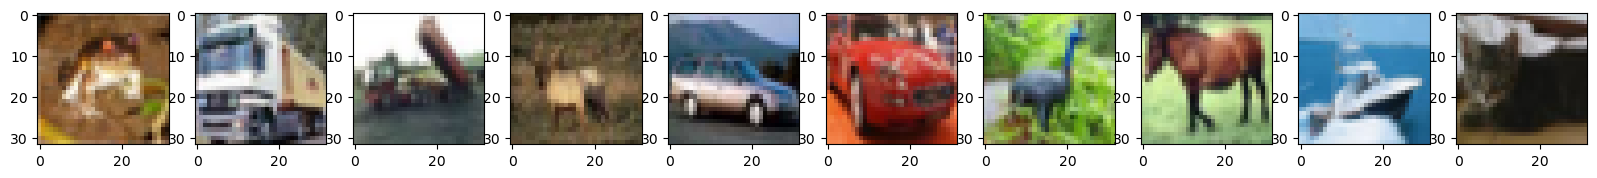

In [11]:
cifar10_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print("Example training images and their labels: " +str([x[0] for x in y_train[0:10]]))
print("Corresponding classes for the labels: "+str([cifar10_classes[x[0]] for x in y_train[0:10]]))
fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

### Shaping the training and the testing dataset

In [12]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Preparing the dataset

In [13]:
X_train = x_train/255.0
X_test = x_test/255.0

### A network of Multi-Layer Perceptron

In [15]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [16]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

C:\Users\Samrat Dudgundi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,313,994 (24.09 MB)

 Trainable params: 6,313,994 (24.09 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = ann.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 112ms/step - accuracy: 0.2868 - loss: 2.2349 - val_accuracy: 0.4000 - val_loss: 1.6895
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 179s 114ms/step - accuracy: 0.3887 - loss: 1.7032 - val_accuracy: 0.4308 - val_loss: 1.5989
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 176s 113ms/step - accuracy: 0.4260 - loss: 1.6094 - val_accuracy: 0.4405 - val_loss: 1.5809
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 176s 113ms/step - accuracy: 0.4415 - loss: 1.5633 - val_accuracy: 0.4493 - val_loss: 1.5439
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - accuracy: 0.4554 - loss: 1.5350 - val_accuracy: 0.4583 - val_loss: 1.5357
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.4578 - loss: 1.5163 - val_accuracy: 0.4484 - val_loss: 1.5359
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 269s 172ms/step - accuracy: 0.4708 - loss: 1.4777 - val_accuracy: 0.4643 - val_loss: 1.4927
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - ac

# Plotting training history

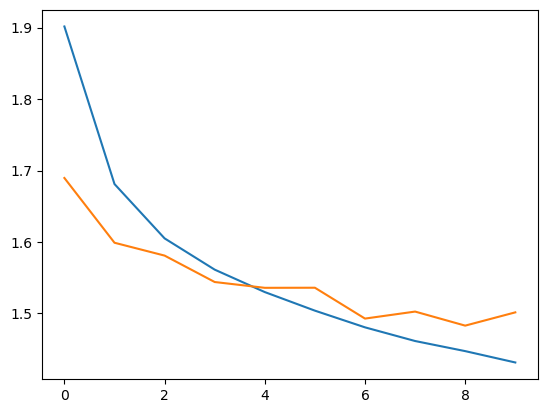

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [22]:
# Since the ANN model is producing very low accuracy, we will move forward with CNN

## CNN Model

In [26]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [27]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size = (3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size = (3,3), strides = (1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

C:\Users\Samrat Dudgundi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,666 (1.73 MB)

 Trainable params: 454,666 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.2914 - loss: 1.9063 - val_accuracy: 0.5463 - val_loss: 1.2533
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5610 - loss: 1.2345 - val_accuracy: 0.6603 - val_loss: 0.9753
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6583 - loss: 0.9784 - val_accuracy: 0.6891 - val_loss: 0.9006
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7128 - loss: 0.8275 - val_accuracy: 0.6897 - val_loss: 0.9074
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7512 - loss: 0.7177 - val_accuracy: 0.7274 - val_loss: 0.7797
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7846 - loss: 0.6221 - val_accuracy: 0.7327 - val_loss: 0.8071
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8006 - loss: 0.5698 - val_accuracy: 0.7334 - val_loss: 0.8235
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8300 -

In [30]:
def plotLosses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

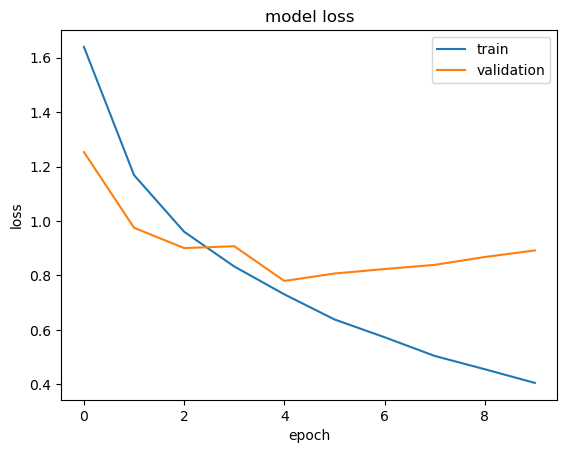

In [32]:
plotLosses(history)

In [34]:
def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

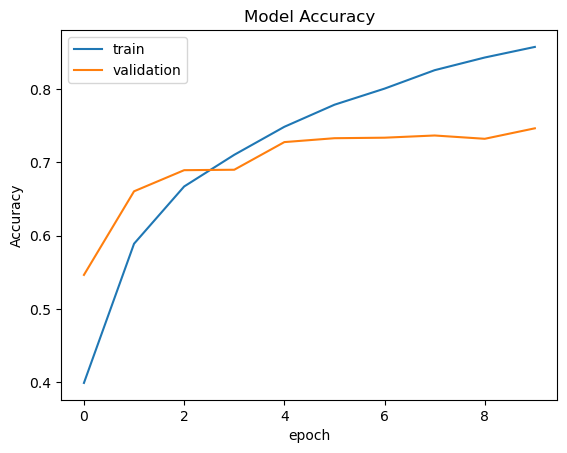

In [35]:
plotAccuracy(history)

In [38]:
from keras.models import load_model
cnn.save('model111.h5')

In [39]:
model = tf.keras.models.load_model('model111.h5')

In [40]:
import numpy as np
x_test_sample = np.expand_dims(x_test[20], axis=0)
model.predict(x_test_sample)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

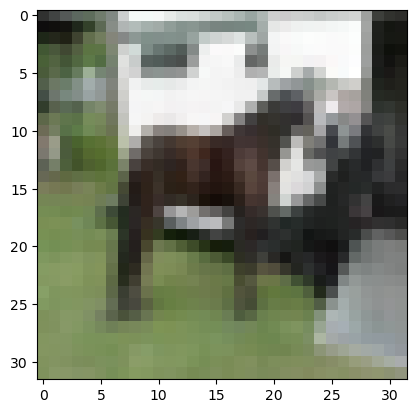

In [41]:
plt.imshow(x_test[20])

In [43]:
class_names = ['airplane','automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']

predictions = model.predict(x_test_sample)
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]
print(f"The predicted class is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
The predicted class is: horse
